In [1]:
import requests

In [2]:
quiz_url = 'https://jsonkeeper.com/b/LLQT'
quiz_submission_url = 'https://api.jsonserve.com/rJvd7g'
history_url = 'https://api.jsonserve.com/XgAgFJ'

In [3]:
quiz_data =requests.get(quiz_url, verify= False).json()
quiz_submission = requests.get(quiz_submission_url, verify= False).json()
history_quiz = requests.get(history_url, verify= False).json()

C:\Users\ghola\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'jsonkeeper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\ghola\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.jsonserve.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\ghola\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.jsonserve.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.

In [5]:
!pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



=== Overall Performance Analysis ===
Number of Quizzes: 14
Average Accuracy: 72.21%
Average Score: 54.43
Total Mistakes Corrected: 40

=== Topic-wise Performance ===
                                          Avg Accuracy  Avg Score  \
topic                                                               
Body Fluids and Circulation                      72.33      78.67   
Body Fluids and Circulation                      80.00      51.33   
Human Reproduction                               38.00      24.00   
Reproductive Health                              43.00      35.00   
Respiration and Gas Exchange                     66.00      21.00   
human health and disease                         93.00     110.00   
microbes in human welfare                       100.00      76.00   
principles of inheritance and variation          30.00       5.00   
reproductive health                              92.00      50.50   

                                          Total Mistakes Corrected  \
top

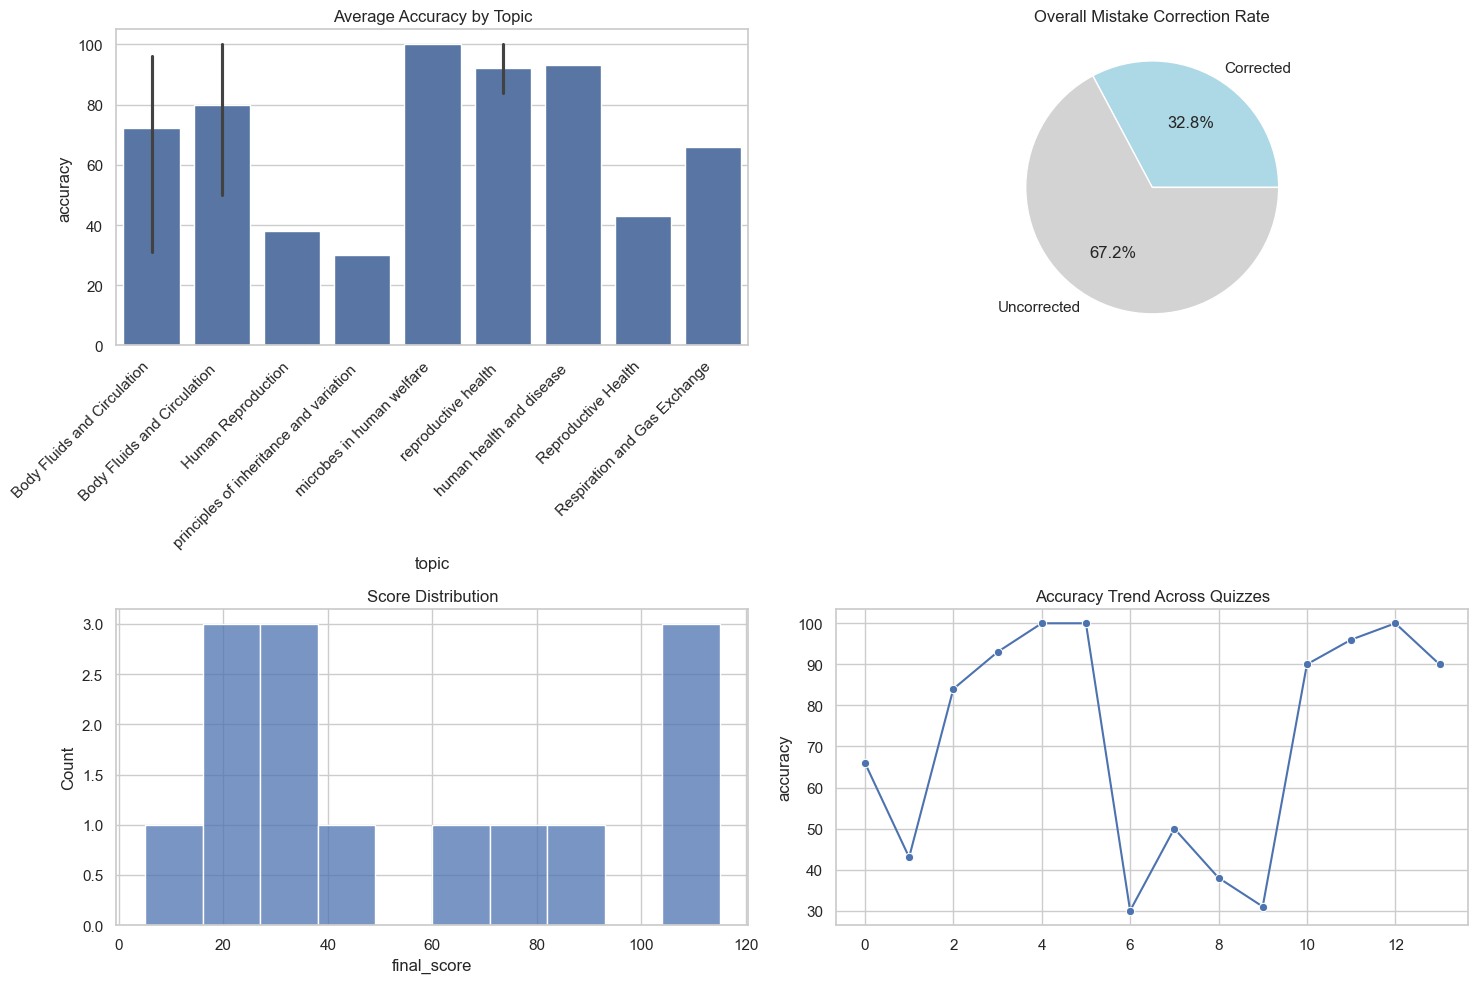


=== Summary Report ===
total_quizzes: 14
average_accuracy: 72.21428571428571
average_score: 54.42857142857143
total_correct_answers: 211
total_incorrect_answers: 82
total_mistakes_corrected: 40
overall_correction_rate: 32.78688524590164
topic_performance: {'Body Fluids and Circulation': 72.33333333333333, 'Body Fluids and Circulation ': 80.0, 'Human Reproduction': 38.0, 'Reproductive Health': 43.0, 'Respiration and Gas Exchange': 66.0, 'human health and disease ': 93.0, 'microbes in human welfare': 100.0, 'principles of inheritance and variation ': 30.0, 'reproductive health ': 92.0}


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

def parse_quiz_data(json_data):
    """Parse JSON string into Python dictionary if needed"""
    if isinstance(json_data, str):
        return json.loads(json_data)
    return json_data

def create_quiz_df(quiz_data):
    """Convert quiz submission data into a pandas DataFrame"""
    # Ensure we're working with a list
    if not isinstance(quiz_data, list):
        quiz_data = [quiz_data]
    
    quiz_records = []
    for quiz in quiz_data:
        # Parse JSON if needed
        quiz = parse_quiz_data(quiz)
        
        try:
            record = {
                'quiz_id': quiz.get('quiz_id'),
                'submission_id': quiz.get('id'),
                'title': quiz.get('quiz', {}).get('title'),
                'topic': quiz.get('quiz', {}).get('topic'),
                'total_questions': quiz.get('total_questions'),
                'correct_answers': quiz.get('correct_answers'),
                'incorrect_answers': quiz.get('incorrect_answers'),
                'accuracy': float(quiz.get('accuracy', '0 %').strip('%')),
                'score': quiz.get('score'),
                'final_score': float(quiz.get('final_score', 0)),
                'negative_score': float(quiz.get('negative_score', 0)),
                'mistakes_corrected': quiz.get('mistakes_corrected'),
                'initial_mistake_count': quiz.get('initial_mistake_count'),
                'duration': quiz.get('duration'),
                'better_than': quiz.get('better_than'),
                'submitted_at': quiz.get('submitted_at')
            }
            quiz_records.append(record)
        except Exception as e:
            print(f"Error processing quiz record: {e}")
            continue
    
    df = pd.DataFrame(quiz_records)
    
    # Convert datetime strings to datetime objects
    if 'submitted_at' in df.columns:
        df['submitted_at'] = pd.to_datetime(df['submitted_at'])
    
    return df

def analyze_performance(df):
    """Analyze performance metrics across quizzes"""
    print("\n=== Overall Performance Analysis ===")
    print(f"Number of Quizzes: {len(df)}")
    print(f"Average Accuracy: {df['accuracy'].mean():.2f}%")
    print(f"Average Score: {df['final_score'].mean():.2f}")
    print(f"Total Mistakes Corrected: {df['mistakes_corrected'].sum()}")
    
    # Topic-wise analysis
    print("\n=== Topic-wise Performance ===")
    topic_stats = df.groupby('topic').agg({
        'accuracy': 'mean',
        'final_score': 'mean',
        'mistakes_corrected': 'sum',
        'quiz_id': 'count'
    }).round(2)
    topic_stats.columns = ['Avg Accuracy', 'Avg Score', 'Total Mistakes Corrected', 'Number of Attempts']
    print(topic_stats)

def plot_performance_metrics(df):
    """Create visualizations for performance metrics"""
    if len(df) == 0:
        print("No data available for plotting")
        return
    
   
    sns.set_theme(style="whitegrid")
    
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Accuracy vs Topic
    if len(df['topic'].unique()) > 0:
        sns.barplot(data=df, x='topic', y='accuracy', ax=axes[0, 0])
        plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
        axes[0, 0].set_title('Average Accuracy by Topic')
    
    # 2. Mistake Correction Rate
    correction_rate = df['mistakes_corrected'].sum() / df['initial_mistake_count'].sum() * 100
    axes[0, 1].pie([correction_rate, 100-correction_rate], 
                   labels=['Corrected', 'Uncorrected'],
                   autopct='%1.1f%%',
                   colors=['lightblue', 'lightgray'])
    axes[0, 1].set_title('Overall Mistake Correction Rate')
    
    # 3. Score Distribution
    sns.histplot(data=df, x='final_score', bins=10, ax=axes[1, 0])
    axes[1, 0].set_title('Score Distribution')
    
    # 4. Performance Trend
    if 'submitted_at' in df.columns:
        df_sorted = df.sort_values('submitted_at')
        sns.lineplot(data=df_sorted, x=range(len(df_sorted)), y='accuracy', 
                    marker='o', ax=axes[1, 1])
    else:
        sns.lineplot(data=df, x=range(len(df)), y='accuracy', 
                    marker='o', ax=axes[1, 1])
    axes[1, 1].set_title('Accuracy Trend Across Quizzes')
    
    plt.tight_layout()
    plt.show()

def generate_summary_report(df):
    """Generate a summary report of the performance"""
    summary = {
        'total_quizzes': len(df),
        'average_accuracy': df['accuracy'].mean(),
        'average_score': df['final_score'].mean(),
        'total_correct_answers': df['correct_answers'].sum(),
        'total_incorrect_answers': df['incorrect_answers'].sum(),
        'total_mistakes_corrected': df['mistakes_corrected'].sum(),
        'overall_correction_rate': (df['mistakes_corrected'].sum() / df['initial_mistake_count'].sum() * 100),
        'topic_performance': df.groupby('topic')['accuracy'].mean().to_dict()
    }
    return summary


if __name__ == "__main__":
    
    quiz_data = quiz_data
    
    # Create DataFrame
    df = create_quiz_df(quiz_data)
    
    # Run analysis
    analyze_performance(df)
    
    # Create visualizations
    plot_performance_metrics(df)
    
    # Generate summary report
    summary = generate_summary_report(df)
    print("\n=== Summary Report ===")
    for key, value in summary.items():
        print(f"{key}: {value}")


=== Quiz Structure Analysis ===
Total number of quiz submissions: 14

Unique topics covered:
- Body Fluids and Circulation
- Body Fluids and Circulation 
- Human Reproduction
- principles of inheritance and variation 
- microbes in human welfare
- reproductive health 
- human health and disease 
- Reproductive Health
- Respiration and Gas Exchange

=== Question Pattern Analysis ===
Average questions per quiz: 55.5
Marks per correct answer: 4.0
Negative marks per wrong answer: 1.0

=== Performance Metrics ===
Average accuracy: 72.2%
Average score: 54.4
Average number of mistakes corrected: 2.9

Average attempt rate: 51.5%


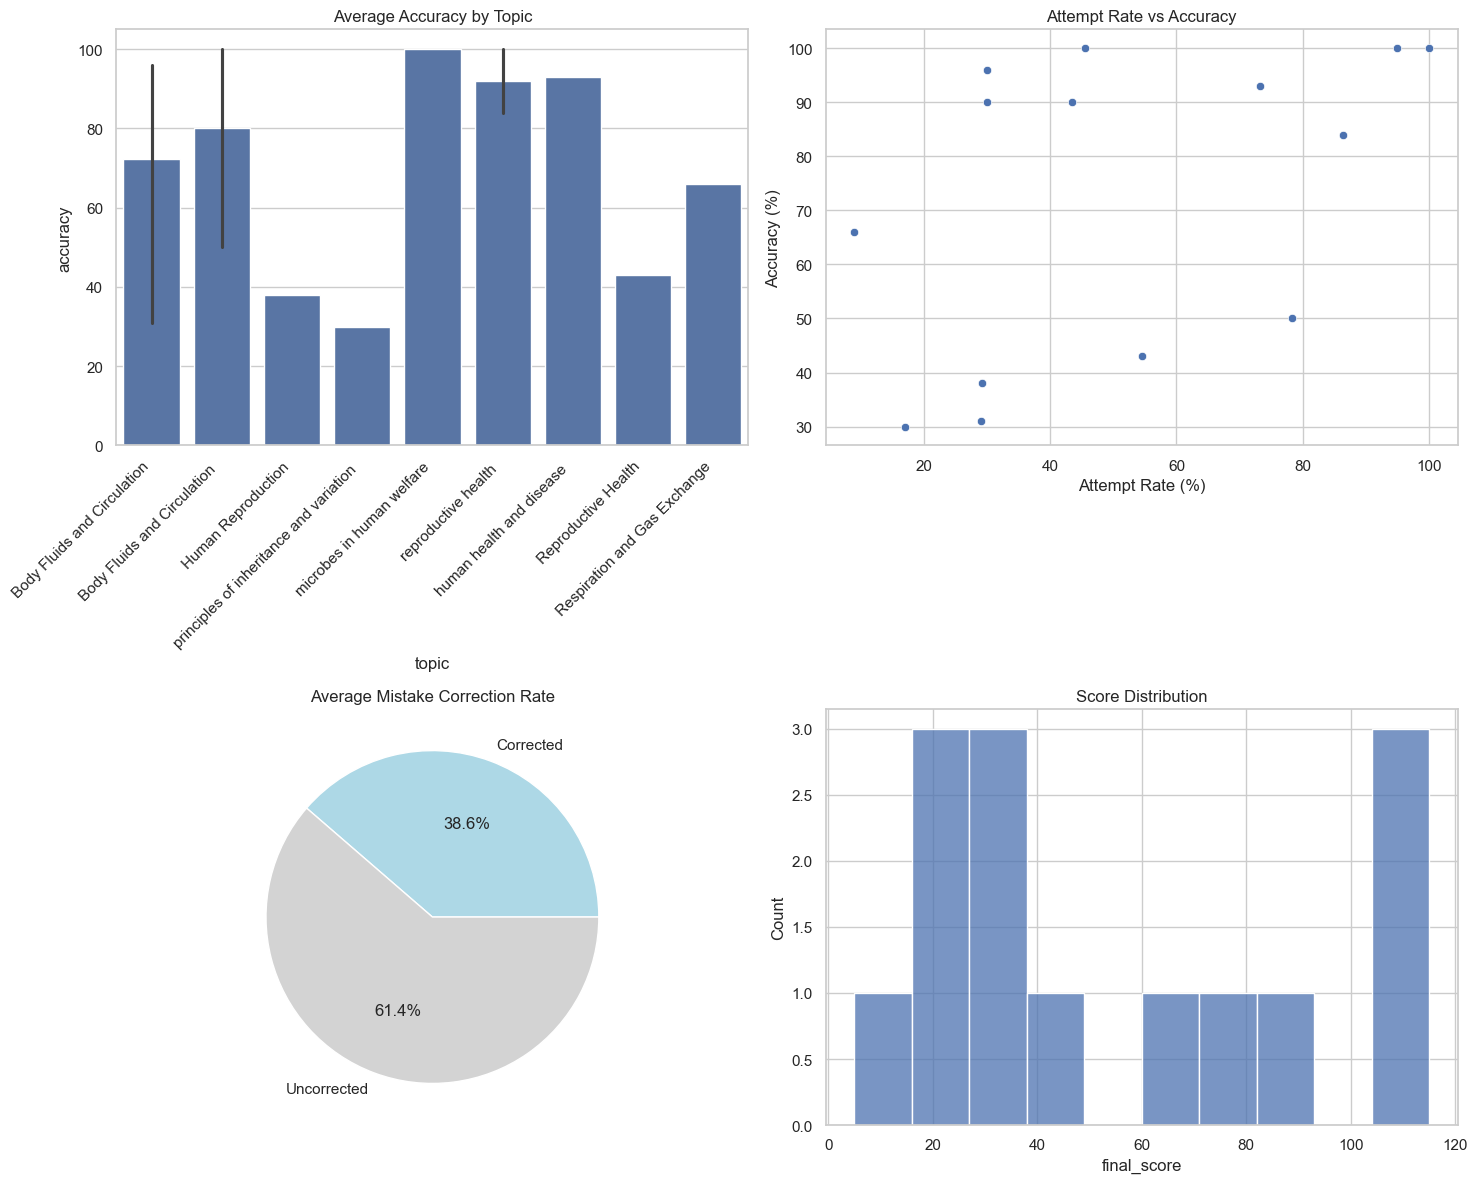


=== Recommendations ===
1. Enhance mistake correction rate through better review and practice
2. Focus more on these topics: Human Reproduction, Reproductive Health, Respiration and Gas Exchange, principles of inheritance and variation 


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def load_quiz_responses(response_data):
    """Process quiz responses into analyzable format"""
    responses = []
    
    # Process each quiz submission
    for submission in response_data:
        quiz_info = {
            'submission_id': submission.get('id'),
            'quiz_id': submission.get('quiz_id'),
            'quiz_title': submission.get('quiz', {}).get('title', ''),
            'topic': submission.get('quiz', {}).get('topic', ''),
            'total_questions': submission.get('total_questions', 0),
            'attempted_questions': submission.get('correct_answers', 0) + submission.get('incorrect_answers', 0),
            'correct_answers': submission.get('correct_answers', 0),
            'incorrect_answers': submission.get('incorrect_answers', 0),
            'accuracy': float(submission.get('accuracy', '0 %').strip(' %')),
            'score': submission.get('score', 0),
            'final_score': float(submission.get('final_score', 0)),
            'negative_score': float(submission.get('negative_score', 0)),
            'duration': submission.get('duration', ''),
            'mistakes_corrected': submission.get('mistakes_corrected', 0),
            'initial_mistake_count': submission.get('initial_mistake_count', 0),
            'better_than': submission.get('better_than', 0),
            'submitted_at': pd.to_datetime(submission.get('submitted_at')),
            'marks_per_question': float(submission.get('quiz', {}).get('correct_answer_marks', 4.0)),
            'negative_marks': float(submission.get('quiz', {}).get('negative_marks', 1.0))
        }
        responses.append(quiz_info)
    
    return pd.DataFrame(responses)

def analyze_quiz_patterns(df):
    """Analyze patterns in quiz structure and student performance"""
    print("\n=== Quiz Structure Analysis ===")
    print(f"Total number of quiz submissions: {len(df)}")
    print(f"\nUnique topics covered:")
    for topic in df['topic'].unique():
        print(f"- {topic}")
    
    print("\n=== Question Pattern Analysis ===")
    print(f"Average questions per quiz: {df['total_questions'].mean():.1f}")
    print(f"Marks per correct answer: {df['marks_per_question'].iloc[0]}")
    print(f"Negative marks per wrong answer: {df['negative_marks'].iloc[0]}")
    
    print("\n=== Performance Metrics ===")
    print(f"Average accuracy: {df['accuracy'].mean():.1f}%")
    print(f"Average score: {df['final_score'].mean():.1f}")
    print(f"Average number of mistakes corrected: {df['mistakes_corrected'].mean():.1f}")
    
    # Calculate attempt rate
    df['attempt_rate'] = (df['attempted_questions'] / df['total_questions']) * 100
    print(f"\nAverage attempt rate: {df['attempt_rate'].mean():.1f}%")

def plot_performance_insights(df):
    """Create visualizations for quiz performance insights"""
    # Set up the plot style
    sns.set_theme(style="whitegrid")
    
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Topic-wise Accuracy
    sns.barplot(data=df, x='topic', y='accuracy', ax=axes[0, 0])
    axes[0, 0].set_title('Average Accuracy by Topic')
    plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # 2. Attempt Rate vs Accuracy
    sns.scatterplot(data=df, x='attempt_rate', y='accuracy', ax=axes[0, 1])
    axes[0, 1].set_title('Attempt Rate vs Accuracy')
    axes[0, 1].set_xlabel('Attempt Rate (%)')
    axes[0, 1].set_ylabel('Accuracy (%)')
    
    # 3. Mistakes Correction Analysis
    correction_rate = df['mistakes_corrected'] / df['initial_mistake_count'] * 100
    axes[1, 0].pie([correction_rate.mean(), 100 - correction_rate.mean()],
                   labels=['Corrected', 'Uncorrected'],
                   autopct='%1.1f%%',
                   colors=['lightblue', 'lightgray'])
    axes[1, 0].set_title('Average Mistake Correction Rate')
    
    # 4. Score Distribution
    sns.histplot(data=df, x='final_score', bins=10, ax=axes[1, 1])
    axes[1, 1].set_title('Score Distribution')
    
    plt.tight_layout()
    plt.show()

def generate_recommendations(df):
    """Generate recommendations based on performance analysis"""
    recommendations = []
    
    # Analyze attempt rate
    low_attempt = df['attempt_rate'].mean() < 50
    if low_attempt:
        recommendations.append("Focus on improving question attempt rate - currently below 50%")
    
    # Analyze accuracy
    avg_accuracy = df['accuracy'].mean()
    if avg_accuracy < 70:
        recommendations.append("Work on improving accuracy through targeted practice")
    
    # Analyze mistake correction
    correction_rate = (df['mistakes_corrected'].sum() / df['initial_mistake_count'].sum()) * 100
    if correction_rate < 60:
        recommendations.append("Enhance mistake correction rate through better review and practice")
    
    # Topic-wise performance
    topic_accuracy = df.groupby('topic')['accuracy'].mean()
    weak_topics = topic_accuracy[topic_accuracy < avg_accuracy].index.tolist()
    if weak_topics:
        recommendations.append(f"Focus more on these topics: {', '.join(weak_topics)}")
    
    return recommendations


if __name__ == "__main__":
    
    quiz_data = history_quiz
    
 
    df = load_quiz_responses(quiz_data)
    analyze_quiz_patterns(df)
    plot_performance_insights(df)
    
   
    recommendations = generate_recommendations(df)
    print("\n=== Recommendations ===")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

In [17]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
class NEETScorePredictor:
    def __init__(self):
        self.model = RandomForestRegressor(
            n_estimators=100,
            random_state=42
        )
        self.scaler = StandardScaler()
        
    def extract_performance_metrics(self, quiz_data):
        """Extract key performance metrics from quiz data"""
        # Convert percentage accuracy to actual score
        accuracy_percentage = float(quiz_data['accuracy'].strip(' %'))
        total_questions = quiz_data['total_questions']
        correct_answers = quiz_data['correct_answers']
        incorrect_answers = quiz_data['incorrect_answers']
        
        # Calculate NEET-style scoring
        # In NEET: +4 for correct, -1 for incorrect
        neet_score = (correct_answers * 4) - (incorrect_answers * 1)
        max_possible_score = total_questions * 4
        
        metrics = {
            'raw_accuracy': accuracy_percentage,
            'neet_score': neet_score,
            'max_possible_score': max_possible_score,
            'neet_scaled_score': self._scale_to_neet(neet_score, max_possible_score),
            'speed': float(quiz_data['speed']),
            'mistakes_corrected': quiz_data['mistakes_corrected'],
            'initial_mistake_count': quiz_data['initial_mistake_count'],
            'correct_answers': correct_answers,
            'incorrect_answers': incorrect_answers,
            'total_questions': total_questions,
            'duration_minutes': self._parse_duration(quiz_data['duration'])
        }
        
        # Calculate derived metrics
        metrics['completion_rate'] = (metrics['correct_answers'] + metrics['incorrect_answers']) / metrics['total_questions'] * 100
        metrics['correction_rate'] = metrics['mistakes_corrected'] / max(1, metrics['initial_mistake_count'])
        metrics['questions_per_minute'] = (metrics['correct_answers'] + metrics['incorrect_answers']) / metrics['duration_minutes']
        
        return metrics
    
    def _scale_to_neet(self, current_score, max_possible_score):
        """Scale the current score to NEET's 720 scale"""
        return int((current_score / max_possible_score) * 720)
    
    def _parse_duration(self, duration_str):
        """Convert duration string to minutes"""
        try:
            minutes, seconds = map(int, duration_str.split(':'))
            return minutes + seconds/60
        except:
            return 15.0  # default duration
    
    def predict_score_and_rank(self, current_quiz_data, historical_quizzes=None):
        """Predict NEET score and rank based on quiz performance"""
        # Extract current quiz metrics
        current_metrics = self.extract_performance_metrics(current_quiz_data)
        
        # Calculate base NEET score
        base_score = current_metrics['neet_scaled_score']
        
        # Adjust score based on various factors
        speed_factor = min(1.1, max(0.9, current_metrics['questions_per_minute'] / 2))  # Optimal: 2 questions per minute
        correction_factor = min(1.1, max(0.9, current_metrics['correction_rate'] * 1.1))
        completion_factor = min(1.1, max(0.9, current_metrics['completion_rate'] / 90))  # Target: 90% completion
        
        # Apply topic-based adjustment
        topic_factor = self._calculate_topic_adjustment(current_quiz_data)
        
        # Consider historical performance if available
        historical_factor = self._calculate_historical_factor(historical_quizzes)
        
        # Calculate final predicted NEET score
        predicted_score = int(base_score * speed_factor * correction_factor * 
                            completion_factor * topic_factor * historical_factor)
        
        # Ensure score doesn't exceed 720
        predicted_score = min(720, max(0, predicted_score))
        
        # Convert score to rank
        predicted_rank = self._score_to_rank(predicted_score)
        
        return {
            'predicted_neet_score': predicted_score,
            'predicted_rank': predicted_rank,
            'confidence_score': self._calculate_confidence(current_metrics),
            'performance_breakdown': {
                'base_score': base_score,
                'speed_adjustment': speed_factor,
                'correction_adjustment': correction_factor,
                'completion_adjustment': completion_factor,
                'topic_adjustment': topic_factor,
                'historical_factor': historical_factor
            }
        }
    
    def _calculate_topic_adjustment(self, quiz_data):
        """Calculate adjustment factor based on topic importance in NEET"""
        topic_weights = {
            'Human Physiology': 1.2,
            'Structural Organisation': 1.0,
            'Body Fluids and Circulation': 1.1,
            'Cell Biology': 1.15,
            'Genetics': 1.2,
            'Ecology': 0.9,
            'Plant Physiology': 1.0,
            'Biotechnology': 0.95
        }
        
        topic = quiz_data['quiz']['topic']
        return topic_weights.get(topic, 1.0)
    
    def _calculate_historical_factor(self, historical_quizzes):
        """Calculate factor based on historical performance trend"""
        if not historical_quizzes:
            return 1.0
        
        # Extract and scale historical scores
        historical_scores = []
        for quiz in historical_quizzes:
            metrics = self.extract_performance_metrics(quiz)
            historical_scores.append(metrics['neet_scaled_score'])
        
        # Calculate trend
        if historical_scores:
            trend = np.polyfit(range(len(historical_scores)), historical_scores, 1)[0]
            # Convert trend to factor (small adjustment)
            return 1 + (np.sign(trend) * min(0.1, abs(trend) / 1000))
        
        return 1.0
    
    def _score_to_rank(self, score):
        """Convert NEET score to rank range based on previous year statistics"""
        if score >= 650:
            return "1-1000"
        elif score >= 600:
            return "1000-5000"
        elif score >= 550:
            return "5000-10000"
        elif score >= 500:
            return "10000-20000"
        elif score >= 450:
            return "20000-50000"
        else:
            return "50000+"
    
    def _calculate_confidence(self, metrics):
        """Calculate confidence score for prediction"""
        factors = [
            metrics['completion_rate'] / 100,  # Completion factor
            metrics['correction_rate'],  # Mistake correction factor
            min(1.0, metrics['questions_per_minute'] / 2),  # Speed factor
            metrics['neet_scaled_score'] / 720  # Score factor
        ]
        
        confidence = (sum(factors) / len(factors)) * 100
        return round(confidence, 2)


if __name__ == "__main__":
    predictor = NEETScorePredictor()
    
    
    current_quiz = quiz_submission
    
   
    prediction = predictor.predict_score_and_rank(current_quiz)
    
    print(f"\nPredicted NEET Score: {prediction['predicted_neet_score']}/720")
    print(f"Predicted Rank Range: {prediction['predicted_rank']}")
    print(f"Prediction Confidence: {prediction['confidence_score']}%")
    print("\nPerformance Breakdown:")
    for factor, value in prediction['performance_breakdown'].items():
        print(f"{factor}: {value:.2f}")


Predicted NEET Score: 30/720
Predicted Rank Range: 50000+
Prediction Confidence: 30.49%

Performance Breakdown:
base_score: 42.00
speed_adjustment: 0.90
correction_adjustment: 0.90
completion_adjustment: 0.90
topic_adjustment: 1.00
historical_factor: 1.00


In [18]:
class NEETCollegePredictor:
    def __init__(self):
        # Sample historical data - in production, this would come from a database
        self.historical_data = pd.DataFrame({
            'college_name': ['AIIMS Delhi', 'JIPMER', 'MAMC Delhi', 'CMC Vellore'],
            'category': ['General', 'General', 'General', 'General'],
            'year': [2023, 2023, 2023, 2023],
            'cutoff_score': [710, 685, 670, 660],
            'last_rank': [50, 150, 300, 400],
            'total_seats': [100, 150, 250, 150]
        })
        
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.scaler = StandardScaler()
        
    def preprocess_student_data(self, neet_score, category, state):
        """Preprocess student data for prediction"""
        student_features = pd.DataFrame({
            'neet_score': [neet_score],
            'category_encoded': [self._encode_category(category)],
            'state_quota': [1 if state == 'Home' else 0]
        })
        return student_features
    
    def _encode_category(self, category):
        """Encode category as numerical value"""
        category_map = {
            'General': 0,
            'OBC': 1,
            'SC': 2,
            'ST': 3
        }
        return category_map.get(category, 0)
    
    def predict_colleges(self, neet_score, category='General', state='Home'):
        """Predict college admission chances based on NEET score"""
        if neet_score < 0 or neet_score > 720:
            raise ValueError("NEET score must be between 0 and 720")
            
        predictions = []
        for _, college in self.historical_data.iterrows():
            # Calculate base probability
            score_diff = neet_score - college['cutoff_score']
            base_prob = self._calculate_base_probability(score_diff)
            
            # Adjust for category
            category_factor = self._get_category_factor(category)
            
            # Adjust for state quota
            state_factor = 1.2 if state == 'Home' else 0.8
            
            # Calculate final probability
            final_prob = min(100, base_prob * category_factor * state_factor)
            
            predictions.append({
                'college_name': college['college_name'],
                'admission_probability': round(final_prob, 2),
                'cutoff_score': college['cutoff_score'],
                'last_rank': college['last_rank'],
                'recommendation': self._get_recommendation(final_prob)
            })
        
        return pd.DataFrame(predictions).sort_values('admission_probability', ascending=False)
    
    def _calculate_base_probability(self, score_diff):
        """Calculate base probability using a logistic function"""
        if score_diff >= 0:
            return 90 + (10 * (1 - np.exp(-score_diff/10)))
        else:
            return max(0, 90 * np.exp(score_diff/20))
    
    def _get_category_factor(self, category):
        """Get multiplier based on category"""
        category_factors = {
            'General': 1.0,
            'OBC': 1.2,
            'SC': 1.3,
            'ST': 1.4
        }
        return category_factors.get(category, 1.0)
    
    def _get_recommendation(self, probability):
        """Get admission chance recommendation"""
        if probability >= 90:
            return "Very High Chance"
        elif probability >= 70:
            return "High Chance"
        elif probability >= 50:
            return "Moderate Chance"
        elif probability >= 30:
            return "Low Chance"
        else:
            return "Very Low Chance"
    
    def update_historical_data(self, new_data):
        """Update historical cutoff data"""
        self.historical_data = pd.concat([self.historical_data, pd.DataFrame(new_data)])
        self.historical_data.drop_duplicates(subset=['college_name', 'category', 'year'], 
                                          keep='latest', inplace=True)

# Example usage
if __name__ == "__main__":
    predictor = NEETCollegePredictor()
    
    # Example prediction
    student_score = prediction['predicted_neet_score']
    student_category = 'General'
    student_state = 'Home'
    
    predictions = predictor.predict_colleges(
        neet_score=student_score,
        category=student_category,
        state=student_state
    )
    
    print("\nCollege Admission Predictions:")
    print(predictions.to_string(index=False))


College Admission Predictions:
college_name  admission_probability  cutoff_score  last_rank  recommendation
 AIIMS Delhi                    0.0           710         50 Very Low Chance
      JIPMER                    0.0           685        150 Very Low Chance
  MAMC Delhi                    0.0           670        300 Very Low Chance
 CMC Vellore                    0.0           660        400 Very Low Chance
